In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://www.spotrac.com/nfl/contracts/sort-value/quarterback/all-time/limit-2000/'

In [3]:
requests.get(url)

<Response [200]>

In [4]:
soup = BeautifulSoup(requests.get(url).content, 'html.parser')

In [5]:
# soup

In [6]:
soup.select('table.datatable.rtable.tablesorter.tablesorter-default.tablesorterb56fc4ad7e97b')

[]

In [7]:
df = pd.read_html(url)[0]

In [8]:
df.to_csv('qb_contract_data.csv')

In [9]:
df.head()

,Rank,Player,Signed Age,Yrs,Value,AAV,Sign Bonus,G'teed @ Sign,Practical G'teed
0,1,Patrick Mahomes Quarterback | 2020-2031 (FA: ...,24,10,"$450,000,000","$45,000,000","$10,000,000","$63,081,905","$141,481,905"
1,2,Josh Allen Quarterback | 2021-2028 (FA: 2029),25,6,"$258,034,000","$43,005,667","$16,500,000","$100,038,596","$150,000,000"
2,3,Russell Wilson Quarterback | 2022-2028 (FA: 2...,33,5,"$242,588,236","$48,517,647","$50,000,000","$124,000,000","$161,000,000"
3,4,Kyler Murray Quarterback | 2022-2028 (FA: 2029),24,5,"$230,500,000","$46,100,000","$29,035,000","$103,300,000","$189,500,000"
4,5,Deshaun Watson Quarterback | 2022-2026 (FA: 2...,26,5,"$230,000,000","$46,000,000","$44,965,000","$230,000,000","$230,000,000"


In [10]:
df["Value"] = df["Value"].str.replace(',','').str.strip('$')
df["AAV"] = df["AAV"].str.replace(',','').str.strip('$')
df["Sign Bonus"] = df["Sign Bonus"].str.replace(',','').str.strip('$')
df["G'teed @ Sign"] = df["G'teed @ Sign"].str.replace(',','').str.strip('$')
df["Practical G'teed"] = df["Practical G'teed"].str.replace(',','').str.strip('$')

In [11]:
ex = df.Player.str.split(' ', expand=True)
ex.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1611,Kelly,Holcomb,,Quarterback,|,1998-1998,(FA:,1999),,Originally,signed,w/,IND,None
1612,Jim,McMahon,,Quarterback,|,1995-1995,(FA:,1996),,Originally,signed,w/,CLE,None
1613,Jim,McMahon,,Quarterback,|,1995-1995,(FA:,0),,Originally,signed,w/,CLE,None
1614,Jon,Kitna,,Quarterback,|,1996-1996,(FA:,1997),,Originally,signed,w/,SEA,None
1615,Akili,Smith,,Quarterback,|,2003-2003,(FA:,0),,Originally,signed,w/,GB,None


In [12]:
ex = ex.drop(columns=[2,3,4,6,8,9,10,11,13])
ex.head()

,0,1,5,7,12
0,Patrick,Mahomes,2020-2031,2032),None
1,Josh,Allen,2021-2028,2029),None
2,Russell,Wilson,2022-2028,2029),None
3,Kyler,Murray,2022-2028,2029),None
4,Deshaun,Watson,2022-2026,2027),None


In [13]:
ex.columns = ['First Name', 'Last Name', 'Years', 'Free Agent', 'Og signed']

In [14]:
ex.head()

,First Name,Last Name,Years,Free Agent,Og signed
0,Patrick,Mahomes,2020-2031,2032),None
1,Josh,Allen,2021-2028,2029),None
2,Russell,Wilson,2022-2028,2029),None
3,Kyler,Murray,2022-2028,2029),None
4,Deshaun,Watson,2022-2026,2027),None


In [15]:
ex['Free Agent'] = ex['Free Agent'].str.strip(')')

In [16]:
df = pd.concat([df, ex], axis=1)

In [17]:
df.head()

,Rank,Player,Signed Age,Yrs,Value,AAV,Sign Bonus,G'teed @ Sign,Practical G'teed,First Name,Last Name,Years,Free Agent,Og signed
0,1,Patrick Mahomes Quarterback | 2020-2031 (FA: ...,24,10,450000000,45000000,10000000,63081905,141481905,Patrick,Mahomes,2020-2031,2032,None
1,2,Josh Allen Quarterback | 2021-2028 (FA: 2029),25,6,258034000,43005667,16500000,100038596,150000000,Josh,Allen,2021-2028,2029,None
2,3,Russell Wilson Quarterback | 2022-2028 (FA: 2...,33,5,242588236,48517647,50000000,124000000,161000000,Russell,Wilson,2022-2028,2029,None
3,4,Kyler Murray Quarterback | 2022-2028 (FA: 2029),24,5,230500000,46100000,29035000,103300000,189500000,Kyler,Murray,2022-2028,2029,None
4,5,Deshaun Watson Quarterback | 2022-2026 (FA: 2...,26,5,230000000,46000000,44965000,230000000,230000000,Deshaun,Watson,2022-2026,2027,None


In [18]:
df = df.drop(columns='Player')

In [19]:
# df["Practical G'teed"] = df["Practical G'teed"].str.replace(',','').str.strip('$')

In [20]:
df.head(1)

,Rank,Signed Age,Yrs,Value,AAV,Sign Bonus,G'teed @ Sign,Practical G'teed,First Name,Last Name,Years,Free Agent,Og signed
0,1,24,10,450000000,45000000,10000000,63081905,141481905,Patrick,Mahomes,2020-2031,2032,None


In [21]:
# df = df.drop(columns='Rank')

In [22]:
df.columns = ['Rank','Signed Age', 'Years', 'Value of Contract', 'AAV', 'Signing Bonus', 'Garunteed at Sign', 'Practical Garunteed', 'First Name', 'Last Name', 'Years of Contract', 'Free Agent', 'Og team signed']

In [23]:
df

,Rank,Signed Age,Years,Value of Contract,AAV,Signing Bonus,Garunteed at Sign,Practical Garunteed,First Name,Last Name,Years of Contract,Free Agent,Og team signed
0,1,24,10,450000000,45000000,10000000,63081905,141481905,Patrick,Mahomes,2020-2031,2032,None
1,2,25,6,258034000,43005667,16500000,100038596,150000000,Josh,Allen,2021-2028,2029,None
2,3,33,5,242588236,48517647,50000000,124000000,161000000,Russell,Wilson,2022-2028,2029,None
3,4,24,5,230500000,46100000,29035000,103300000,189500000,Kyler,Murray,2022-2028,2029,None
4,5,26,5,230000000,46000000,44965000,230000000,230000000,Deshaun,Watson,2022-2026,2027,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,1612,24,1,193520,193520,NaN,NaN,NaN,Kelly,Holcomb,1998-1998,1999,IND
1612,1613,35,1,178000,178000,NaN,NaN,NaN,Jim,McMahon,1995-1995,1996,CLE
1613,1614,35,1,136118,136118,NaN,NaN,NaN,Jim,McMahon,1995-1995,0,CLE
1614,1615,23,1,134500,134500,3500,NaN,3500,Jon,Kitna,1996-1996,1997,SEA


In [24]:
df = df[['Rank', 'First Name', 'Last Name', 'Years of Contract', 'Free Agent', 'Signed Age', 'Years', 'Value of Contract', 'AAV', 'Signing Bonus', 'Garunteed at Sign', 'Practical Garunteed', 'Og team signed']]

In [25]:
df.head()

,Rank,First Name,Last Name,Years of Contract,Free Agent,Signed Age,Years,Value of Contract,AAV,Signing Bonus,Garunteed at Sign,Practical Garunteed,Og team signed
0,1,Patrick,Mahomes,2020-2031,2032,24,10,450000000,45000000,10000000,63081905,141481905,None
1,2,Josh,Allen,2021-2028,2029,25,6,258034000,43005667,16500000,100038596,150000000,None
2,3,Russell,Wilson,2022-2028,2029,33,5,242588236,48517647,50000000,124000000,161000000,None
3,4,Kyler,Murray,2022-2028,2029,24,5,230500000,46100000,29035000,103300000,189500000,None
4,5,Deshaun,Watson,2022-2026,2027,26,5,230000000,46000000,44965000,230000000,230000000,None


In [26]:
df['Year Contract Start'] = df['Years of Contract'].str[:4]
df['Year Contract End'] = df['Years of Contract'].str[-4:]

/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_17021/1206199302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year Contract Start'] = df['Years of Contract'].str[:4]
/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_17021/1206199302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year Contract End'] = df['Years of Contract'].str[-4:]


In [27]:
df.head()

,Rank,First Name,Last Name,Years of Contract,Free Agent,Signed Age,Years,Value of Contract,AAV,Signing Bonus,Garunteed at Sign,Practical Garunteed,Og team signed,Year Contract Start,Year Contract End
0,1,Patrick,Mahomes,2020-2031,2032,24,10,450000000,45000000,10000000,63081905,141481905,None,2020,2031
1,2,Josh,Allen,2021-2028,2029,25,6,258034000,43005667,16500000,100038596,150000000,None,2021,2028
2,3,Russell,Wilson,2022-2028,2029,33,5,242588236,48517647,50000000,124000000,161000000,None,2022,2028
3,4,Kyler,Murray,2022-2028,2029,24,5,230500000,46100000,29035000,103300000,189500000,None,2022,2028
4,5,Deshaun,Watson,2022-2026,2027,26,5,230000000,46000000,44965000,230000000,230000000,None,2022,2026


In [28]:
df['Free Agent'] = df['Free Agent'].str.replace('\(FA:', '0')

/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_17021/3617514729.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Free Agent'] = df['Free Agent'].str.replace('\(FA:', '0')
/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_17021/3617514729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Free Agent'] = df['Free Agent'].str.replace('\(FA:', '0')


In [29]:
df['Free Agent'] = df['Free Agent'].str.replace('20002', '2002')

/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_17021/39060357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Free Agent'] = df['Free Agent'].str.replace('20002', '2002')


In [30]:
df['Free Agent'] = df['Free Agent'].astype(int)

/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_17021/1824731942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Free Agent'] = df['Free Agent'].astype(int)


In [31]:
df.head(1)

,Rank,First Name,Last Name,Years of Contract,Free Agent,Signed Age,Years,Value of Contract,AAV,Signing Bonus,Garunteed at Sign,Practical Garunteed,Og team signed,Year Contract Start,Year Contract End
0,1,Patrick,Mahomes,2020-2031,2032,24,10,450000000,45000000,10000000,63081905,141481905,None,2020,2031


In [32]:
df['Signed Age'] = df['Signed Age'].str.replace('-','0')

/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_17021/3626988505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signed Age'] = df['Signed Age'].str.replace('-','0')


In [33]:
df['Signed Age'] = df['Signed Age'].astype(int)

/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_17021/3289388351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signed Age'] = df['Signed Age'].astype(int)


In [34]:
df['Value of Contract'] = df['Value of Contract'].astype(int)

/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_17021/2960525225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value of Contract'] = df['Value of Contract'].astype(int)


In [35]:
df['AAV'] = df['AAV'].astype(int)

/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_17021/3080951856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AAV'] = df['AAV'].astype(int)


In [36]:
df['Signing Bonus'] = df['Signing Bonus'].fillna('0').astype(int)

/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_17021/3306414625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signing Bonus'] = df['Signing Bonus'].fillna('0').astype(int)


In [37]:
df.head(1)

,Rank,First Name,Last Name,Years of Contract,Free Agent,Signed Age,Years,Value of Contract,AAV,Signing Bonus,Garunteed at Sign,Practical Garunteed,Og team signed,Year Contract Start,Year Contract End
0,1,Patrick,Mahomes,2020-2031,2032,24,10,450000000,45000000,10000000,63081905,141481905,None,2020,2031


In [38]:
df['Garunteed at Sign'] = df['Garunteed at Sign'].fillna('0').astype(int)

/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_17021/2071552996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Garunteed at Sign'] = df['Garunteed at Sign'].fillna('0').astype(int)


In [39]:
df['Practical Garunteed'] = df['Practical Garunteed'].fillna('0').astype(int)

/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_17021/3241600253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Practical Garunteed'] = df['Practical Garunteed'].fillna('0').astype(int)


In [40]:
df['Og team signed'] = df['Og team signed'].fillna('Not Available')

/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_17021/4253690961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Og team signed'] = df['Og team signed'].fillna('Not Available')


In [41]:
df['Year Contract Start'] = df['Year Contract Start'].str.replace('|', '0').astype(int)

/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_17021/3265477521.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Year Contract Start'] = df['Year Contract Start'].str.replace('|', '0').astype(int)
/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_17021/3265477521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year Contract Start'] = df['Year Contract Start'].str.replace('|', '0').astype(int)


In [42]:
df['Year Contract End'] = df['Year Contract End'].str.replace('|', '0').astype(int)

/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_17021/1479004253.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Year Contract End'] = df['Year Contract End'].str.replace('|', '0').astype(int)
/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_17021/1479004253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year Contract End'] = df['Year Contract End'].str.replace('|', '0').astype(int)


In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,1616.0,8.064109e+02,4.658927e+02,1.0,404.75,808.5,1210.0,1.616000e+03
Free Agent,1616.0,1.967040e+03,3.054443e+02,0.0,2010.00,2016.0,2020.0,2.032000e+03
Signed Age,1616.0,2.568502e+01,6.727453e+00,0.0,23.00,26.0,29.0,4.400000e+01
Years,1616.0,2.453589e+00,1.575061e+00,1.0,1.00,2.0,3.0,1.000000e+01
Value of Contract,1616.0,1.010077e+07,2.680092e+07,10000.0,910000.00,1700750.0,5133247.0,4.500000e+08
AAV,1616.0,2.957032e+06,5.806635e+06,10000.0,568750.00,853020.5,2500000.0,5.027167e+07
Signing Bonus,1616.0,2.107883e+06,6.305288e+06,0.0,0.00,12500.0,772229.0,6.600000e+07
Garunteed at Sign,1616.0,2.812705e+06,1.191032e+07,0.0,0.00,0.0,100000.0,2.300000e+08
Practical Garunteed,1616.0,5.523631e+06,5.572858e+07,0.0,0.00,0.0,516250.0,2.147484e+09
Year Contract Start,1616.0,1.985785e+03,2.280784e+02,0.0,2007.00,2014.0,2018.0,2.022000e+03


In [44]:
df.to_csv('qb_contract_data.csv')

In [45]:
# pd.read_html('https://overthecap.com/position/quarterback')[0]

In [46]:
df.head()

,Rank,First Name,Last Name,Years of Contract,Free Agent,Signed Age,Years,Value of Contract,AAV,Signing Bonus,Garunteed at Sign,Practical Garunteed,Og team signed,Year Contract Start,Year Contract End
0,1,Patrick,Mahomes,2020-2031,2032,24,10,450000000,45000000,10000000,63081905,141481905,Not Available,2020,2031
1,2,Josh,Allen,2021-2028,2029,25,6,258034000,43005667,16500000,100038596,150000000,Not Available,2021,2028
2,3,Russell,Wilson,2022-2028,2029,33,5,242588236,48517647,50000000,124000000,161000000,Not Available,2022,2028
3,4,Kyler,Murray,2022-2028,2029,24,5,230500000,46100000,29035000,103300000,189500000,Not Available,2022,2028
4,5,Deshaun,Watson,2022-2026,2027,26,5,230000000,46000000,44965000,230000000,230000000,Not Available,2022,2026


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

(1970.0, 2022.0)

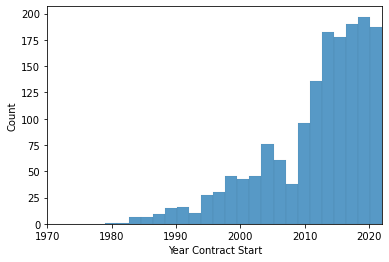

In [48]:
sns.histplot(data=df, x='Year Contract Start')
plt.xlim(1970,2022)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616 entries, 0 to 1615
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Rank                 1616 non-null   int64 
 1   First Name           1616 non-null   object
 2   Last Name            1616 non-null   object
 3   Years of Contract    1616 non-null   object
 4   Free Agent           1616 non-null   int64 
 5   Signed Age           1616 non-null   int64 
 6   Years                1616 non-null   int64 
 7   Value of Contract    1616 non-null   int64 
 8   AAV                  1616 non-null   int64 
 9   Signing Bonus        1616 non-null   int64 
 10  Garunteed at Sign    1616 non-null   int64 
 11  Practical Garunteed  1616 non-null   int64 
 12  Og team signed       1616 non-null   object
 13  Year Contract Start  1616 non-null   int64 
 14  Year Contract End    1616 non-null   int64 
dtypes: int64(11), object(4)
memory usage: 189.5+ KB


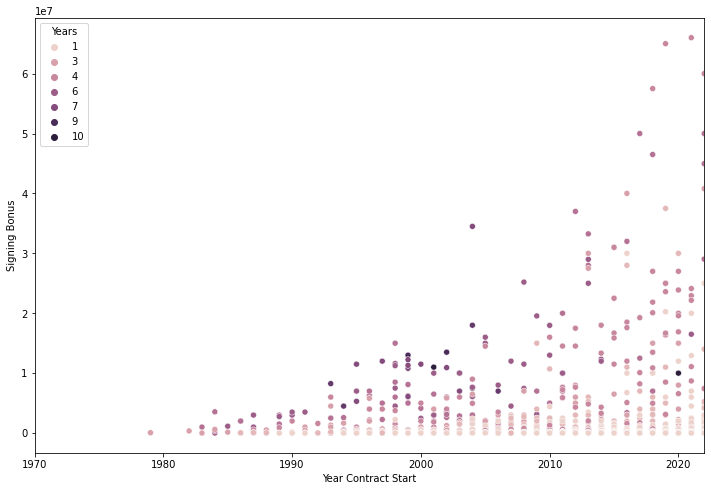

In [50]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Year Contract Start', y='Signing Bonus', hue='Years')
plt.xlim(1970, 2022)
plt.show()

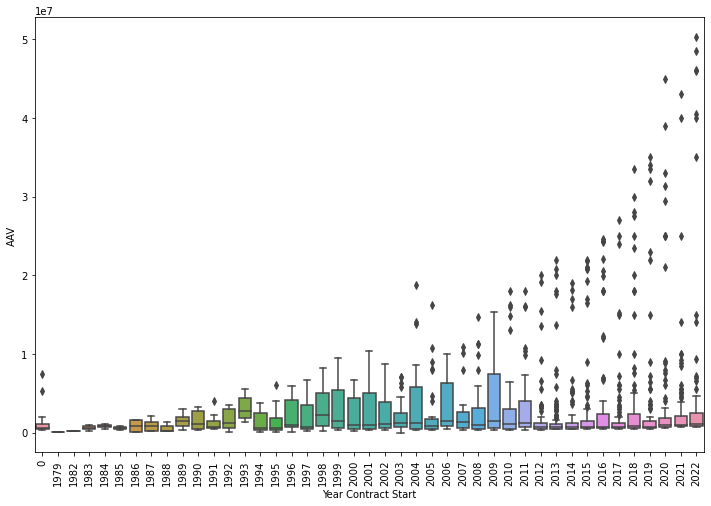

In [51]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='Year Contract Start', y='AAV')
plt.xticks(rotation=90)
plt.show()

In [52]:
df[df['Last Name'] == 'Rodgers']

,Rank,First Name,Last Name,Years of Contract,Free Agent,Signed Age,Years,Value of Contract,AAV,Signing Bonus,Garunteed at Sign,Practical Garunteed,Og team signed,Year Contract Start,Year Contract End
8,9,Aaron,Rodgers,2022-2024,2025,38,3,150815000,50271667,40800000,101515000,150815000,Not Available,2022,2024
15,15,Aaron,Rodgers,2018-2023,2024,34,4,134000000,33500000,57500000,79200000,98700000,Not Available,2018,2023
25,26,Aaron,Rodgers,2013-2019,2020,29,5,110000000,22000000,33250000,33250000,54000000,Not Available,2013,2019
68,69,Aaron,Rodgers,2009-2014,2015,24,6,63520000,10586667,0,0,20000000,Not Available,2009,2014
328,329,Aaron,Rodgers,2005-2009,2010,21,5,7700000,1540000,1500000,0,2120000,Not Available,2005,2009
867,865,Kevin,Rodgers,2015-2017,2018,0,3,1575000,525000,0,0,0,Not Available,2015,2017
918,919,Jordan,Rodgers,2013-2015,2016,24,3,1487500,495833,2500,0,2500,JAC,2013,2015
1194,1192,Jordan,Rodgers,2014-2015,2016,25,2,930000,465000,0,0,0,TB,2014,2015
1569,1570,Jordan,Rodgers,2014-2014,2015,25,1,420000,420000,0,0,0,Not Available,2014,2014


In [53]:
df['Full Name'] = df['First Name'] + ' ' +df['Last Name']

/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_17021/1936827961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Full Name'] = df['First Name'] + ' ' +df['Last Name']


In [54]:
df.groupby('Full Name').AAV.mean().sort_values(ascending=False).head(10)

Full Name
Deshaun Watson      2.948786e+07
Kyler Murray        2.750725e+07
Russell Wilson      2.654171e+07
Patrick Mahomes     2.455322e+07
Josh Allen          2.418321e+07
Matthew Stafford    2.416667e+07
Dak Prescott        2.402995e+07
Aaron Rodgers       2.357967e+07
Kirk Cousins        2.342330e+07
Derek Carr          2.228098e+07
Name: AAV, dtype: float64

In [55]:
caps = pd.read_html('https://www.spotrac.com/nfl/cba/')[0]

In [56]:
caps = caps[['Year', 'Cap Maximum']]

In [57]:
df = df.merge(caps, how='left', left_on='Year Contract Start', right_on='Year')

In [58]:
df['Cap Maximum'] = df['Cap Maximum'].str.strip('$').str.replace(',','').str.replace('Uncapped', '121500000').fillna('0').astype(int)

In [59]:
df.to_csv('qb_contracts_v2')

In [60]:
df.head()

,Rank,First Name,Last Name,Years of Contract,Free Agent,Signed Age,Years,Value of Contract,AAV,Signing Bonus,Garunteed at Sign,Practical Garunteed,Og team signed,Year Contract Start,Year Contract End,Full Name,Year,Cap Maximum
0,1,Patrick,Mahomes,2020-2031,2032,24,10,450000000,45000000,10000000,63081905,141481905,Not Available,2020,2031,Patrick Mahomes,2020.0,198200000
1,2,Josh,Allen,2021-2028,2029,25,6,258034000,43005667,16500000,100038596,150000000,Not Available,2021,2028,Josh Allen,2021.0,182500000
2,3,Russell,Wilson,2022-2028,2029,33,5,242588236,48517647,50000000,124000000,161000000,Not Available,2022,2028,Russell Wilson,2022.0,208200000
3,4,Kyler,Murray,2022-2028,2029,24,5,230500000,46100000,29035000,103300000,189500000,Not Available,2022,2028,Kyler Murray,2022.0,208200000
4,5,Deshaun,Watson,2022-2026,2027,26,5,230000000,46000000,44965000,230000000,230000000,Not Available,2022,2026,Deshaun Watson,2022.0,208200000


In [61]:
df['pct_of_cap'] = (df['AAV']/df['Cap Maximum'])

In [62]:
df[df['Cap Maximum'] > 0].sort_values('pct_of_cap', ascending=False).head()

,Rank,First Name,Last Name,Years of Contract,Free Agent,Signed Age,Years,Value of Contract,AAV,Signing Bonus,Garunteed at Sign,Practical Garunteed,Og team signed,Year Contract Start,Year Contract End,Full Name,Year,Cap Maximum,pct_of_cap
8,9,Aaron,Rodgers,2022-2024,2025,38,3,150815000,50271667,40800000,101515000,150815000,Not Available,2022,2024,Aaron Rodgers,2022.0,208200000,0.241459
1,2,Josh,Allen,2021-2028,2029,25,6,258034000,43005667,16500000,100038596,150000000,Not Available,2021,2028,Josh Allen,2021.0,182500000,0.235647
2,3,Russell,Wilson,2022-2028,2029,33,5,242588236,48517647,50000000,124000000,161000000,Not Available,2022,2028,Russell Wilson,2022.0,208200000,0.233034
24,25,Steve,McNair,2004-2009,2010,30,6,112250010,18708335,6090010,0,0,Not Available,2004,2009,Steve McNair,2004.0,80582000,0.232165
0,1,Patrick,Mahomes,2020-2031,2032,24,10,450000000,45000000,10000000,63081905,141481905,Not Available,2020,2031,Patrick Mahomes,2020.0,198200000,0.227043


In [63]:
df[df['Cap Maximum'] > 0].groupby('Year Contract Start').mean()

,Rank,Free Agent,Signed Age,Years,Value of Contract,AAV,Signing Bonus,Garunteed at Sign,Practical Garunteed,Year Contract End,Year,Cap Maximum,pct_of_cap
Year Contract Start,,,,,,,,,,,,,
1994,988.454545,1996.909091,25.272727,2.909091,6.185273e+06,1.378167e+06,8.800000e+05,0.000000e+00,9.545455e+03,1995.909091,1994.0,34608000.0,0.039822
1995,913.687500,1873.687500,23.625000,3.250000,7.509093e+06,1.458508e+06,1.678531e+06,6.021875e+04,6.021875e+04,1997.437500,1995.0,37100000.0,0.039313
1996,696.250000,1998.812500,26.312500,2.687500,8.121281e+06,2.359458e+06,1.780219e+06,5.625000e+04,1.408344e+06,1997.812500,1996.0,40753000.0,0.057897
1997,847.571429,2000.071429,26.571429,3.071429,9.285625e+06,1.956935e+06,1.857964e+06,7.296429e+04,7.403571e+04,1999.071429,1997.0,41454000.0,0.047207
1998,599.476190,2001.523810,26.047619,3.476190,1.391231e+07,3.066724e+06,3.560000e+06,7.921429e+05,8.040476e+05,2000.523810,1998.0,52388000.0,0.058539
1999,692.041667,2002.916667,26.333333,3.916667,1.793219e+07,3.057309e+06,3.972292e+06,4.625000e+05,4.708333e+05,2001.916667,1999.0,57288000.0,0.053367
2000,814.428571,2002.904762,25.571429,2.809524,9.284429e+06,2.155698e+06,1.433429e+06,4.726190e+04,8.814762e+05,2001.904762,2000.0,62172000.0,0.034673
2001,672.545455,2004.909091,28.590909,3.954545,2.016704e+07,3.164231e+06,2.035750e+06,1.363636e+04,2.021500e+06,2003.909091,2001.0,67405000.0,0.046944
2002,718.608696,2005.565217,23.608696,3.521739,1.389717e+07,2.532305e+06,2.464652e+06,2.869565e+05,5.879130e+05,2004.565217,2002.0,71101000.0,0.035616


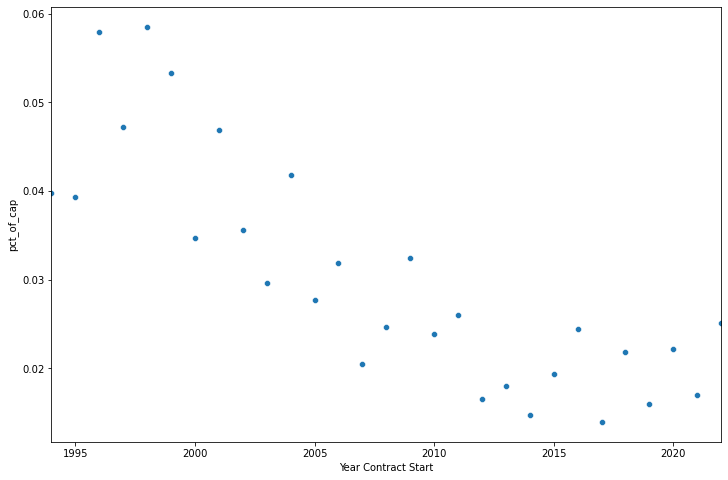

In [64]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df[df['Cap Maximum'] > 0].groupby('Year Contract Start').mean(), x='Year Contract Start', y='pct_of_cap')
plt.xlim(1994,2022)
plt.show()

<Figure size 864x576 with 0 Axes>

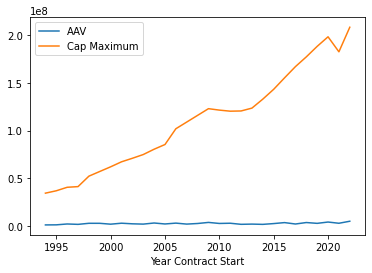

In [65]:
plt.figure(figsize=(12,8))
df[df['Year Contract Start'] > 1993][['AAV', 'Cap Maximum', 'Year Contract Start']].groupby('Year Contract Start').mean().plot()
plt.show()

(1994.0, 2022.0)

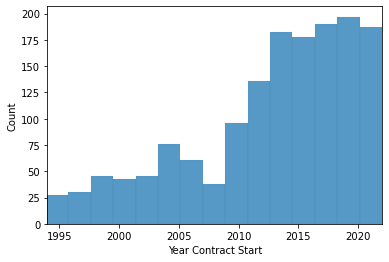

In [66]:
sns.histplot(data=df, x='Year Contract Start')
plt.xlim(1994,2022)

In [67]:
hold = df[df['Year Contract Start']>1993][['AAV', 'Cap Maximum', 'Year Contract Start']].sort_values('AAV', ascending=False).groupby('Year Contract Start').head(2)
hold

,AAV,Cap Maximum,Year Contract Start
8,50271667,208200000,2022
2,48517647,208200000,2022
0,45000000,198200000,2020
1,43005667,182500000,2021
5,40000000,182500000,2021
7,39000000,198200000,2020
10,35000000,188200000,2019
61,34000000,188200000,2019
15,33500000,177200000,2018
9,30000000,177200000,2018


<AxesSubplot:xlabel='Year Contract Start'>

<Figure size 864x576 with 0 Axes>

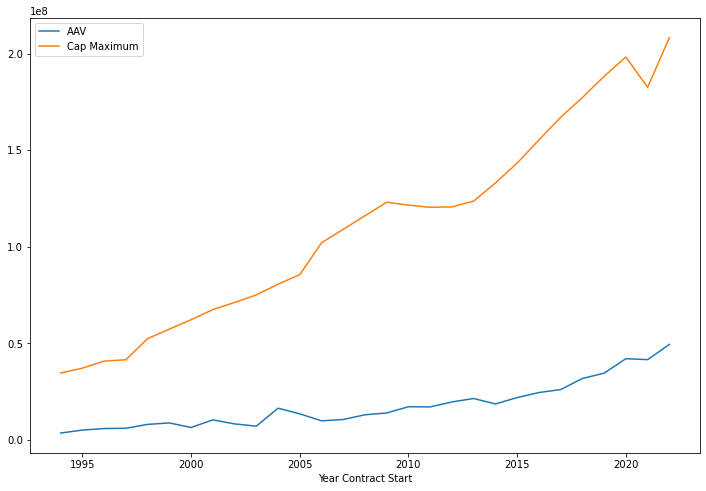

In [68]:
plt.figure(figsize=(12,8))
hold.groupby('Year Contract Start').mean().plot(figsize=(12,8))

In [69]:
df.head(1)

,Rank,First Name,Last Name,Years of Contract,Free Agent,Signed Age,Years,Value of Contract,AAV,Signing Bonus,Garunteed at Sign,Practical Garunteed,Og team signed,Year Contract Start,Year Contract End,Full Name,Year,Cap Maximum,pct_of_cap
0,1,Patrick,Mahomes,2020-2031,2032,24,10,450000000,45000000,10000000,63081905,141481905,Not Available,2020,2031,Patrick Mahomes,2020.0,198200000,0.227043


In [70]:
df['AAV_manual'] = (df['Value of Contract']+df['Signing Bonus'])/df.Years

In [71]:
hold = df[df['Year Contract Start']>1993][['AAV_manual', 'Cap Maximum', 'Year Contract Start']].sort_values('AAV_manual', ascending=False).groupby('Year Contract Start').head(2)

<AxesSubplot:xlabel='Year Contract Start'>

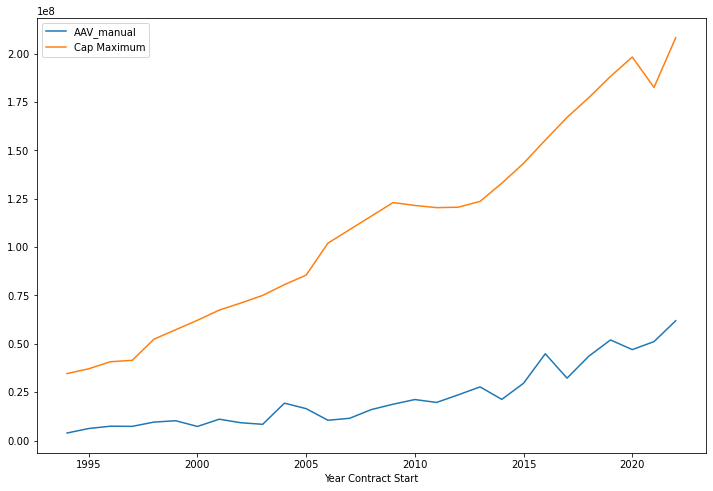

In [72]:
hold.groupby('Year Contract Start').mean().plot(figsize=(12,8))

In [73]:
df['cap_per_player'] = df['Cap Maximum']/53

In [74]:
hold = df[df['Year Contract Start']>1993][['AAV', 'cap_per_player', 'Year Contract Start']]\
.sort_values('AAV', ascending=False).groupby('Year Contract Start').head(5)

<AxesSubplot:xlabel='Year Contract Start'>

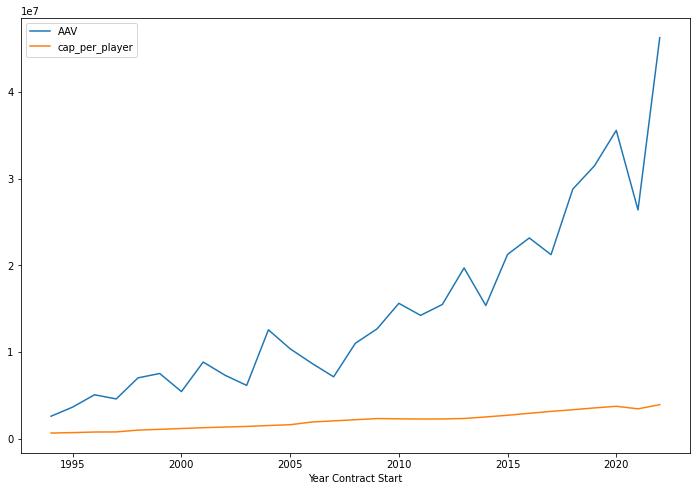

In [75]:
hold.groupby('Year Contract Start').mean().plot(figsize=(12,8))

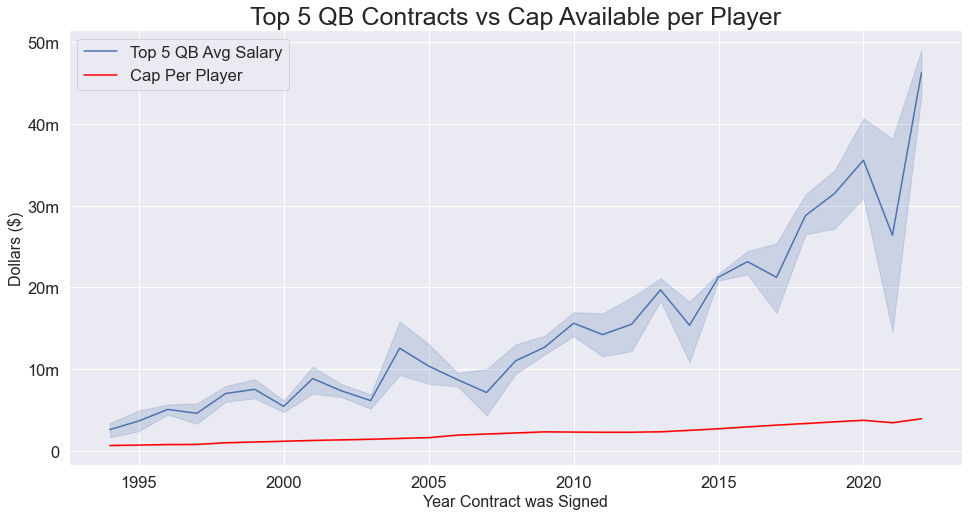

In [76]:
plt.figure(figsize=(16,8))
sns.set(font_scale=1.5)
sns.lineplot(data=hold, x='Year Contract Start', y='AAV', label='Top 5 QB Avg Salary')
sns.lineplot(data=hold, x='Year Contract Start', y='cap_per_player', label='Cap Per Player', color='red')
plt.title('Top 5 QB Contracts vs Cap Available per Player', fontsize=25)
plt.ylabel('Dollars ($)', fontsize=16)
plt.xlabel('Year Contract was Signed', fontsize=16)
plt.yticks(ticks=[0,10_000_000,20_000_000, 30_000_000, 40_000_000, 50_000_000], labels=['0', '10m', '20m', '30m', '40m', '50m'])
# plt.ticklabel_format(style='plain', axis='y')
plt.grid(visible=True)
plt.legend()
plt.savefig('fig1.png')
plt.show()

In [77]:
df.head()

,Rank,First Name,Last Name,Years of Contract,Free Agent,Signed Age,Years,Value of Contract,AAV,Signing Bonus,...,Practical Garunteed,Og team signed,Year Contract Start,Year Contract End,Full Name,Year,Cap Maximum,pct_of_cap,AAV_manual,cap_per_player
0,1,Patrick,Mahomes,2020-2031,2032,24,10,450000000,45000000,10000000,...,141481905,Not Available,2020,2031,Patrick Mahomes,2020.0,198200000,0.227043,4.600000e+07,3.739623e+06
1,2,Josh,Allen,2021-2028,2029,25,6,258034000,43005667,16500000,...,150000000,Not Available,2021,2028,Josh Allen,2021.0,182500000,0.235647,4.575567e+07,3.443396e+06
2,3,Russell,Wilson,2022-2028,2029,33,5,242588236,48517647,50000000,...,161000000,Not Available,2022,2028,Russell Wilson,2022.0,208200000,0.233034,5.851765e+07,3.928302e+06
3,4,Kyler,Murray,2022-2028,2029,24,5,230500000,46100000,29035000,...,189500000,Not Available,2022,2028,Kyler Murray,2022.0,208200000,0.221422,5.190700e+07,3.928302e+06
4,5,Deshaun,Watson,2022-2026,2027,26,5,230000000,46000000,44965000,...,230000000,Not Available,2022,2026,Deshaun Watson,2022.0,208200000,0.220941,5.499300e+07,3.928302e+06


In [78]:
df = df.drop(columns='AAV_manual')

In [79]:
df.to_csv('qb_contracts_data_v2.csv')

In [80]:
year = 2004
df2 = pd.read_html(f'https://www.teamrankings.com/nfl/trends/win_trends/?range=yearly_2003')[0]
df2['year'] = 2003
while year <= 2022:
    df3 = pd.read_html(f'https://www.teamrankings.com/nfl/trends/win_trends/?range=yearly_{year}')[0]
    df3['year'] = year
    df2 = pd.concat([df2,df3])
    year += 1

In [81]:
df2

,Team,Win-Loss Record,Win %,MOV,ATS +/-,year
0,New England,17-2-0,89.5%,6.6,4.3,2003
1,Kansas City,13-4-0,76.5%,8.5,2.9,2003
2,Indianapolis,14-5-0,73.7%,7.3,4.5,2003
3,Philadelphia,13-5-0,72.2%,4.4,1.8,2003
4,Tennessee,13-5-0,72.2%,6.2,3.0,2003
...,...,...,...,...,...,...
27,Carolina,4-8-0,33.3%,-3.0,1.5,2022
28,Denver,3-8-0,27.3%,-3.4,-4.2,2022
29,LA Rams,3-8-0,27.3%,-6.8,-7.5,2022
30,Chicago,3-9-0,25.0%,-4.5,0.1,2022


In [82]:
df2 = df2.drop(columns=['ATS +/-', 'MOV'])

In [83]:
df2.columns = ['team', 'win_loss_record', 'win_pct', 'year']

In [84]:
df2

,team,win_loss_record,win_pct,year
0,New England,17-2-0,89.5%,2003
1,Kansas City,13-4-0,76.5%,2003
2,Indianapolis,14-5-0,73.7%,2003
3,Philadelphia,13-5-0,72.2%,2003
4,Tennessee,13-5-0,72.2%,2003
...,...,...,...,...
27,Carolina,4-8-0,33.3%,2022
28,Denver,3-8-0,27.3%,2022
29,LA Rams,3-8-0,27.3%,2022
30,Chicago,3-9-0,25.0%,2022


In [85]:
records = df2.win_loss_record.str.split('-', expand=True)

In [86]:
records.columns = ['win', 'loss', 'tie']

In [87]:
records.head()

,win,loss,tie
0,17,2,0
1,13,4,0
2,14,5,0
3,13,5,0
4,13,5,0


In [88]:
df2 = pd.concat([df2,records], axis=1)

In [89]:
df2 = df2.drop(columns = ['win_loss_record'])

In [90]:
df2.head(1)

,team,win_pct,year,win,loss,tie
0,New England,89.5%,2003,17,2,0


In [91]:
df.head(1)

,Rank,First Name,Last Name,Years of Contract,Free Agent,Signed Age,Years,Value of Contract,AAV,Signing Bonus,Garunteed at Sign,Practical Garunteed,Og team signed,Year Contract Start,Year Contract End,Full Name,Year,Cap Maximum,pct_of_cap,cap_per_player
0,1,Patrick,Mahomes,2020-2031,2032,24,10,450000000,45000000,10000000,63081905,141481905,Not Available,2020,2031,Patrick Mahomes,2020.0,198200000,0.227043,3.739623e+06


In [92]:
page = 19
year = 2021
df4 = pd.read_html(f'https://www.teamrankings.com/nfl/player-stat/qb-rating-nfl?season_id=20')[0]
df4['year'] = 2022
while page >= 1:
    df5 = pd.read_html(f'https://www.teamrankings.com/nfl/player-stat/qb-rating-nfl?season_id={page}')[0]
    df5['year'] = year
    df4 = pd.concat([df4,df5])
    year -= 1
    page -= 1

In [93]:
df4 = df4.drop(columns=['Pos', 'Value', 'Rank'])

In [94]:
df4

,Player,Team,year
0,Tua Tagovailoa,Miami Dolphins,2022
1,Geno Smith,Seattle Seahawks,2022
2,Jalen Hurts,Philadelphia Eagles,2022
3,Patrick Mahomes,Kansas City Chiefs,2022
4,Jimmy Garoppolo,San Francisco 49ers,2022
...,...,...,...
27,Drew Brees,Los Angeles Chargers,2003
28,Rick Mirer,Las Vegas Raiders,2003
29,Joey Harrington,Detroit Lions,2003
30,Kyle Boller,Baltimore Ravens,2003


In [95]:
df = df.merge(df4, how='left', left_on=['Full Name', 'Year Contract Start'], right_on=['Player', 'year'])

In [96]:
team_records = df2

In [97]:
team_records

,team,win_pct,year,win,loss,tie
0,New England,89.5%,2003,17,2,0
1,Kansas City,76.5%,2003,13,4,0
2,Indianapolis,73.7%,2003,14,5,0
3,Philadelphia,72.2%,2003,13,5,0
4,Tennessee,72.2%,2003,13,5,0
...,...,...,...,...,...,...
27,Carolina,33.3%,2022,4,8,0
28,Denver,27.3%,2022,3,8,0
29,LA Rams,27.3%,2022,3,8,0
30,Chicago,25.0%,2022,3,9,0


In [98]:
df = df.drop(columns=['Player', 'year', 'Year'])

In [99]:
df.head()

,Rank,First Name,Last Name,Years of Contract,Free Agent,Signed Age,Years,Value of Contract,AAV,Signing Bonus,Garunteed at Sign,Practical Garunteed,Og team signed,Year Contract Start,Year Contract End,Full Name,Cap Maximum,pct_of_cap,cap_per_player,Team
0,1,Patrick,Mahomes,2020-2031,2032,24,10,450000000,45000000,10000000,63081905,141481905,Not Available,2020,2031,Patrick Mahomes,198200000,0.227043,3.739623e+06,Kansas City Chiefs
1,2,Josh,Allen,2021-2028,2029,25,6,258034000,43005667,16500000,100038596,150000000,Not Available,2021,2028,Josh Allen,182500000,0.235647,3.443396e+06,Buffalo Bills
2,3,Russell,Wilson,2022-2028,2029,33,5,242588236,48517647,50000000,124000000,161000000,Not Available,2022,2028,Russell Wilson,208200000,0.233034,3.928302e+06,Denver Broncos
3,4,Kyler,Murray,2022-2028,2029,24,5,230500000,46100000,29035000,103300000,189500000,Not Available,2022,2028,Kyler Murray,208200000,0.221422,3.928302e+06,Arizona Cardinals
4,5,Deshaun,Watson,2022-2026,2027,26,5,230000000,46000000,44965000,230000000,230000000,Not Available,2022,2026,Deshaun Watson,208200000,0.220941,3.928302e+06,NaN


In [100]:
team_records.head()

,team,win_pct,year,win,loss,tie
0,New England,89.5%,2003,17,2,0
1,Kansas City,76.5%,2003,13,4,0
2,Indianapolis,73.7%,2003,14,5,0
3,Philadelphia,72.2%,2003,13,5,0
4,Tennessee,72.2%,2003,13,5,0


In [101]:
df.to_csv('qb_contracts_data_v3.csv')

In [102]:
team_records.to_csv('team_records.csv')